In [1]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pickle

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
def plotImage(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

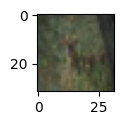

In [9]:
plotImage(10)

In [10]:
x_trained_scaled=x_train/255
x_test_scaled=x_test/255

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10, dtype='float32'
)
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10, dtype='float32'
)
y_train_categorical[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
x_trained_scaled.shape

(50000, 32, 32, 3)

In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), 
    keras.layers.Dense(3000,activation='relu'), 
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='SGD', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.fit(x_trained_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 12s 6ms/step - loss: 1.8082 - accuracy: 0.3550
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6215 - accuracy: 0.4289
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5419 - accuracy: 0.4556
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4784 - accuracy: 0.4798
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4307 - accuracy: 0.4949
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3894 - accuracy: 0.5103
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3471 - accuracy: 0.5247
Epoch 8/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3127 - accuracy: 0.5411
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2810 - accuracy: 0.5523
Epoch 10/50
1563/1563 [==============================] - 7s 5ms/step - loss:

In [19]:
with open('chapter_17_model','wb') as f:
    pickle.dump(model,f)

INFO:tensorflow:Assets written to: ram://761f9b8b-c8b8-41f5-b90a-eb05bd2dde83/assets


In [20]:
classes 
classes[np.argmax(model.predict(x_test_scaled)[7])]

313/313 [==============================] - 1s 2ms/step


'frog'

In [21]:
classes[y_test[7][0]]

'frog'

In [25]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 4ms/step - loss: 1.6731 - accuracy: 0.5480


[1.6730644702911377, 0.5479999780654907]

In [30]:
def train_model():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), 
    keras.layers.Dense(3000,activation='relu'), 
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])

    model.compile(
    optimizer='SGD', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )
    return model

In [31]:

%%timeit -n1 -r1
with tf.device('/CPU:0'): 
    model_cpu=train_model()
    model_cpu.fit(x_trained_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 47s 30ms/step - loss: 1.8113 - accuracy: 0.3517
48 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [32]:

%%timeit -n1 -r1
with tf.device('/GPU:0'): 
    model_cpu=train_model()
    model_cpu.fit(x_trained_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 10s 6ms/step - loss: 1.8149 - accuracy: 0.3540
11 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
